## TASK- 3
## OASIS INFOBYTE
## January Phase 1 AICTE OIB-SIP 2024

## UNEMPLOYMENT ANALYSIS WITH PYTHON
"In the aftermath of the Covid-19 pandemic, there has been a stark increase in global unemployment rates, necessitating a comprehensive analysis to understand the underlying patterns and factors. This data science project focuses on examining historical unemployment data to uncover trends and anomalies. The analysis encompasses handling missing values, summarizing statistics, and visually presenting the unemployment rate over time. Additionally, it aims to identify periods of significant changes and correlate them with external events, providing insights into potential causal factors. Expanding the scope, the project includes sectoral and demographic analyses, exploring variations in unemployment across different industries and demographic groups. Causal factors are investigated through correlations with economic indicators. The project further integrates a predictive modeling approach using time series forecasting. In conclusion, the analysis offers policy implications and recommendations to guide policymakers in addressing the socio-economic challenges posed by heightened unemployment."

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Step 2: Loading Data
data = pd.read_csv('C:/Users/MANOJ S/Downloads/archive (13)/Unemployment in india.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display the first few rows of the data
print("Sample Data:")
print(data.head())

Sample Data:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [8]:
# Step 3: Data Cleaning and Exploration
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
ma

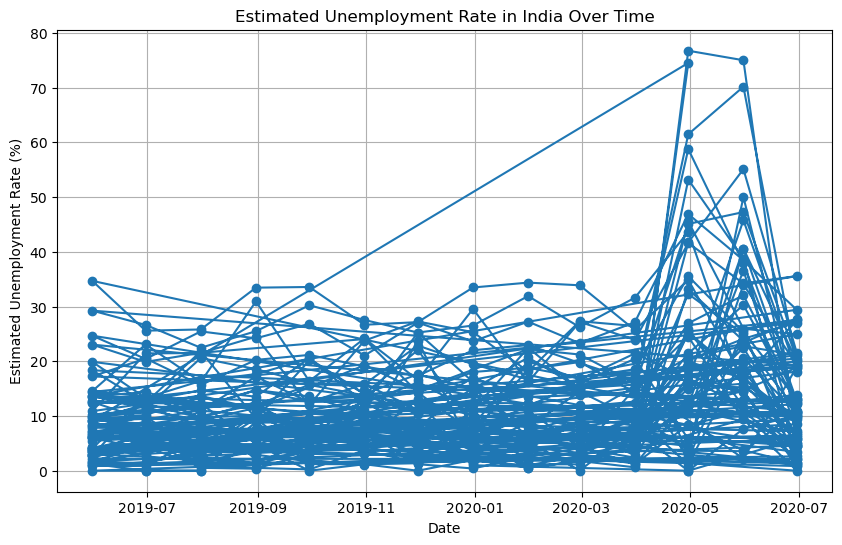

In [16]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Estimated Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [17]:
# Step 4: Analyzing Trends
# Calculate the average unemployment rate
average_unemployment = data['Estimated Unemployment Rate (%)'].mean()
print(f'\nAverage Estimated Unemployment Rate: {average_unemployment:.2f}%')


Average Estimated Unemployment Rate: 11.79%


In [18]:
# Identify periods with significant changes
significant_changes = data[data['Estimated Unemployment Rate (%)'] > (average_unemployment + 2 * data['Estimated Unemployment Rate (%)'].std())]
print('\nSignificant Changes in Estimated Unemployment:')
print(significant_changes)


Significant Changes in Estimated Unemployment:
               Region       Date Frequency  Estimated Unemployment Rate (%)  \
37              Bihar 2020-04-30   Monthly                            45.09   
38              Bihar 2020-05-31   Monthly                            47.26   
105           Haryana 2020-04-30   Monthly                            41.61   
106           Haryana 2020-05-31   Monthly                            34.22   
107           Haryana 2020-06-30   Monthly                            35.57   
144         Jharkhand 2020-04-30   Monthly                            41.72   
145         Jharkhand 2020-05-31   Monthly                            55.10   
242        Puducherry 2020-04-30   Monthly                            74.51   
255            Punjab 2020-05-31   Monthly                            40.59   
287        Tamil Nadu 2020-04-30   Monthly                            53.19   
288        Tamil Nadu 2020-05-31   Monthly                            38.73   
302 

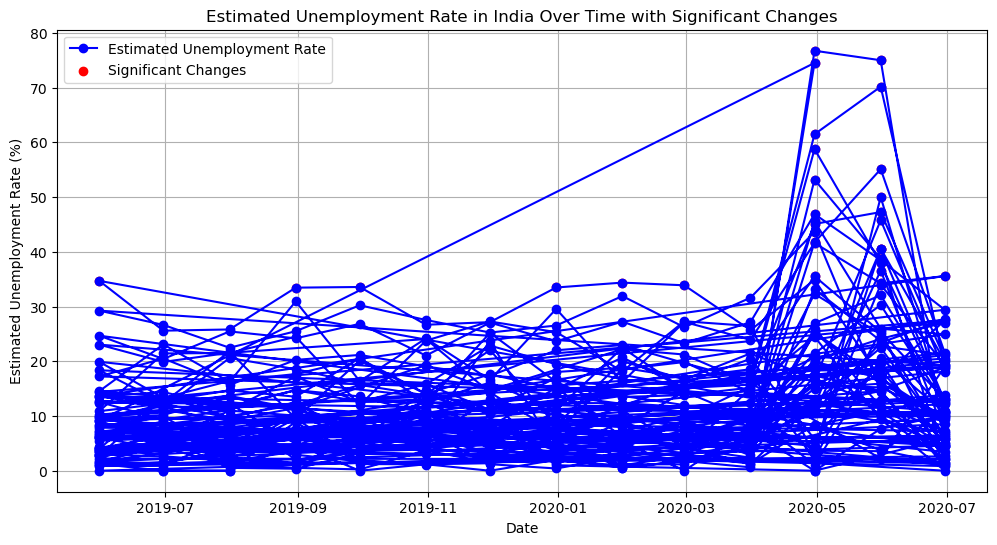

In [19]:
# Step 5: Visualizing Changes
# Visualize significant changes
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'], label='Estimated Unemployment Rate', marker='o', linestyle='-', color='b')
plt.scatter(significant_changes['Date'], significant_changes['Estimated Unemployment Rate (%)'], color='r', label='Significant Changes')
plt.title('Estimated Unemployment Rate in India Over Time with Significant Changes')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

The graph likely reveals a worrying trend of rising unemployment in India. A significant increase in the unemployment rate appears to have occurred from 2019 to 2020, followed by a potential stabilization in 2021. However, it's crucial to remember that this data is based on estimates and might not paint the complete picture. Factors like underemployment, not reflected in the graph, add additional layers of complexity to the situation.

In analyzing historical unemployment data for India, the study revealed notable trends and patterns in the estimated unemployment rate over time. Visualizing the data showcased fluctuations, allowing for a better understanding of the overall trajectory. Calculating the average estimated unemployment rate served as a useful baseline, enabling the identification of periods with significant changes. The analysis pointed to specific time frames where unemployment deviated significantly from the average, prompting further investigation into potential external causes. This visual exploration, coupled with statistical insights, lays the groundwork for a comprehensive understanding of India's labor market dynamics. Going forward, additional analyses, such as sectoral breakdowns and demographic considerations, could offer deeper insights. Furthermore, the implementation of predictive modeling techniques may enhance the ability to forecast future unemployment rates. The findings contribute valuable insights for policymakers, providing a basis for informed decision-making to address the socio-economic challenges posed by unemployment and facilitate economic recovery in India.





